# Does including "Free" in the app name make a difference? A statistical analysis

## Inroduction

The word "FREE" usually is used to attract new customers to new or curretn product as part of marketing campaigns, because "FREE" draws customers eyes to where the buisnesses want them to go. But, is this theory works in the app market where most of the apps available on Google Playstore or Apple Appstore are free. Some urgue the word "FREE" attract customers in the mobile app market as well, while others think it lost its magic on customers eyes since developers are more tend to create free apps and generate income from attracting customers to buy pro versions or upgrades while using the app.

In this analysis, We have a sample of web scraped data of 10k Playstore apps by Lavanya Gupta. The data will be used to analyize the effect of the word "FREE" by evaluating the affect of inclusion it on customer review rating, number of customer reviews and total number of app installs.

## Dataset

The data in this analysis are divided into two cvs files. the first file consist of application detail and metrics of 10,841 app. it consist of 13 columns:

1- App : Application name - title

2- Category : The apps are devided into 34 categories

3- Rating : Overall customer rating of the app

4- Reviews : Number of customers reviews for the app

5- Size : Size of the app 

6- Installs : Number of customer downloads/installs for the app

7- Type: type of the app (Paid or Free)

8- Price: Price of the app (for paid apps only)

9- Content Rating: Age group the app is targeted at (80% of the apps are targeting everyone)

10- Genres: There are 118 generes and apps can belong to multiple geners apart of its main category

11- Last Updated: Dates when the app was last updated on Playstore

12- Current Ver: the current version of the app availabe on Playstore

13- Android Ver: Minimum required Android version


The second file consist of the first most releveant 100 reviews for each app. each review text/comment has pre-processed and attributed with 3 new features - Sentiment, Sentiment Polarity and Sentiment Subjectivity.

Sentiment in this dataset means the overall feeling of the customer after using the app (Negative, Neutral, Positive)

Sentiment Polarity is a measure of cutomer satisfaction/desatisfaction based on his/her review on the app where +1 means extremely satisfied(postive) and -1 means extremly desatisfied(negative), while the score of zero means neither both of them (Neutral)

Sentiment Subjectivity is a measure of the quality of the review and hwo much it is related to the customer expereince with app. it has a score from 0 to 1 where 0 means not subjective review while 1 means extremly subjective review 

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
play_store_stat = pd.read_csv('C:/Users/rabia/Desktop/Thinkful/Capstone project 1/googleplaystore.csv')
play_store_reviews = pd.read_csv('C:/Users/rabia/Desktop/Thinkful/Capstone project 1/googleplaystore_user_reviews.csv')

In [85]:
play_store_stat.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [86]:
len(play_store_stat)

10841

In [87]:
play_store_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [88]:
len(play_store_reviews)

64295

According to above, the total numer of apps is 10,841 app, while the numer of review is 64,295. if avery app has 100 reviews then the total number of reviiews should be 100,841 rveiew which way more than what we actually have.

Below, we are going to group the reviews by the app name and check how many reviews per app

In [89]:
play_store_reviews.groupby('App').count().head()

,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
App,,,,
10 Best Foods for You,194,194,194,194
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,40,40,40,40
11st,39,40,40,40
1800 Contacts - Lens Store,80,80,80,80
1LINE – One Line with One Touch,38,38,38,38


It looks like some apps have more than 100 rveiews and others have less than 100 reviews. We will work on compaining both files in one file with the name "play_store". the first step in to group both files by app name and then compain them

In this process, we are going to clean the data and remove the duplicates. The total number of apps after removing the duplicates and companing the file is 680 app

In [90]:
play_store_reviews_grouped = play_store_reviews.groupby('App').mean()
play_store_reviews_grouped.head()

,Sentiment_Polarity,Sentiment_Subjectivity
App,,
10 Best Foods for You,0.470733,0.495455
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.392405,0.545516
11st,0.181294,0.443957
1800 Contacts - Lens Store,0.318145,0.591098
1LINE – One Line with One Touch,0.196290,0.557315


In [91]:
len(play_store_reviews_grouped)

1074

In [123]:
play_store = play_store_stat.merge(play_store_reviews_grouped, on='App')
play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,reviews_numeric,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,967,0.152652,0.641540
1,Coloring book moana,FAMILY,3.9,974,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,974,0.152652,0.641540
2,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,13791,0.268483,0.523447
3,3D Color Pixel by Number - Sandbox Art Coloring,ART_AND_DESIGN,4.4,1518,37M,"100,000+",Free,0,Everyone,Art & Design,"August 3, 2018",1.2.3,2.3 and up,1518,NaN,NaN
4,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,39M,"5,000,000+",Free,0,Everyone,Art & Design,"August 3, 2018",2.2.5,4.0.3 and up,194216,0.412649,0.679226


In [132]:
play_store.sort_values('App', inplace = True)
play_store.drop_duplicates(subset = 'App', keep = False, inplace = True)
play_store.head()
len(play_store)

680

## Data Visulization

In this section we will explore the data and find out the data insights and providing comments and findings of it

In [156]:
play_store.Reviews = play_store.Reviews.astype(int)

Text(0.5, 1.0, 'Number of Apps per category')

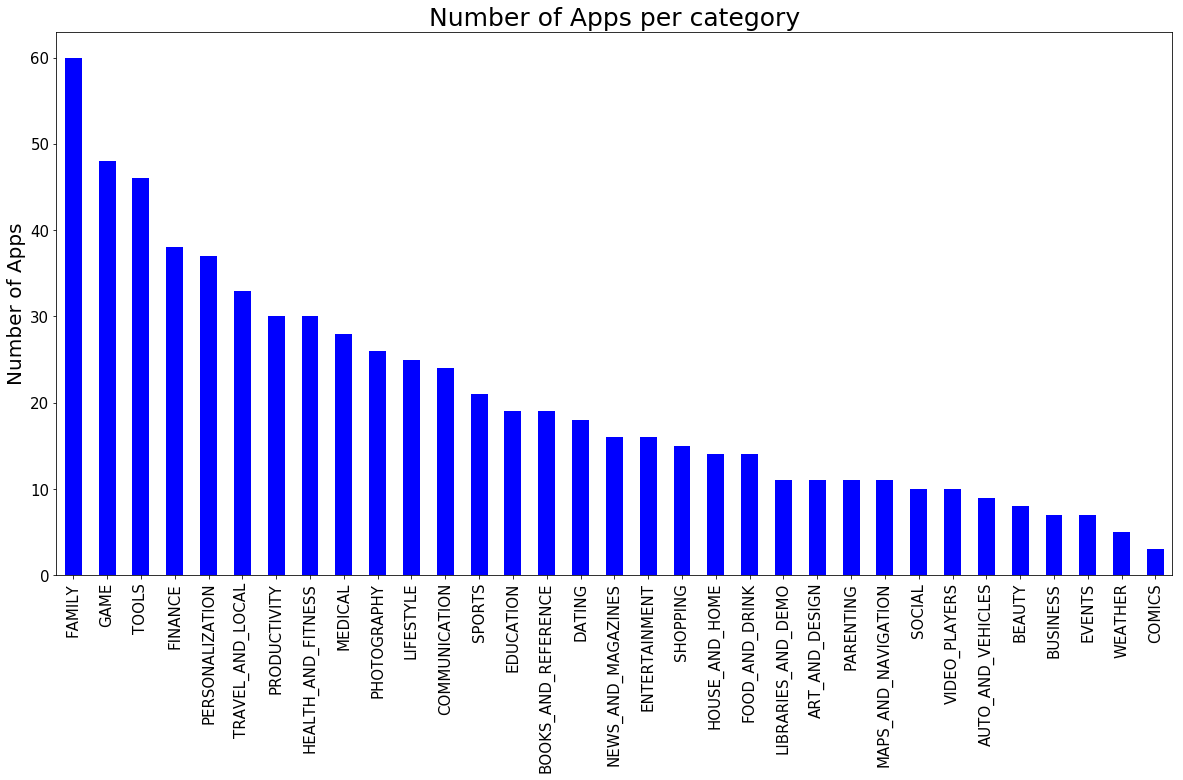

In [103]:
play_store_category = play_store.groupby('Category').mean()
plt.figure(figsize=(20,10))
play_store.Category.value_counts().plot(kind='bar', color = 'blue')
plt.xticks(foplay_store['installs_numeric'] = pd.to_numeric(play_store_stat['Installs'].str.replace('+','').str.replace(',',''), errors='ignore')ntsize=15, rotation=90)
plt.yticks(fontsize=15, rotation=0)
plt.ylabel('Number of Apps', fontsize = 20)
plt.title('Number of Apps per category', fontsize = 25)

Famnily app category is the most app category represnted in the data (10%)

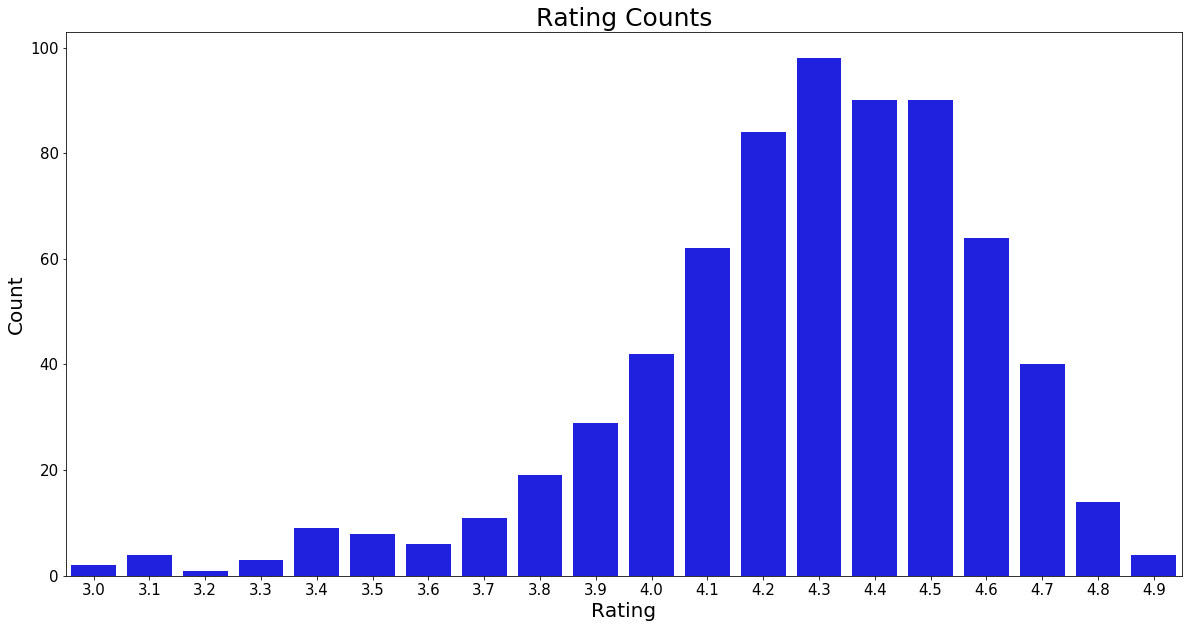

In [104]:
plt.figure(figsize=(20,10))
rating_count = sns.countplot(x="Rating", data=play_store, color= 'blue')
rating_count.axes.set_title("Rating Counts",fontsize=25)
rating_count.set_xlabel("Rating",fontsize=20)
rating_count.set_ylabel("Count",fontsize=20)
rating_count.tick_params(labelsize=15)

The distribution of customers reviews rating is skewed to the left. most of the reviews are between 4 and 5 

In [16]:
play_store_category = play_store.groupby('Category').mean().sort_values(('Rating'), ascending=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

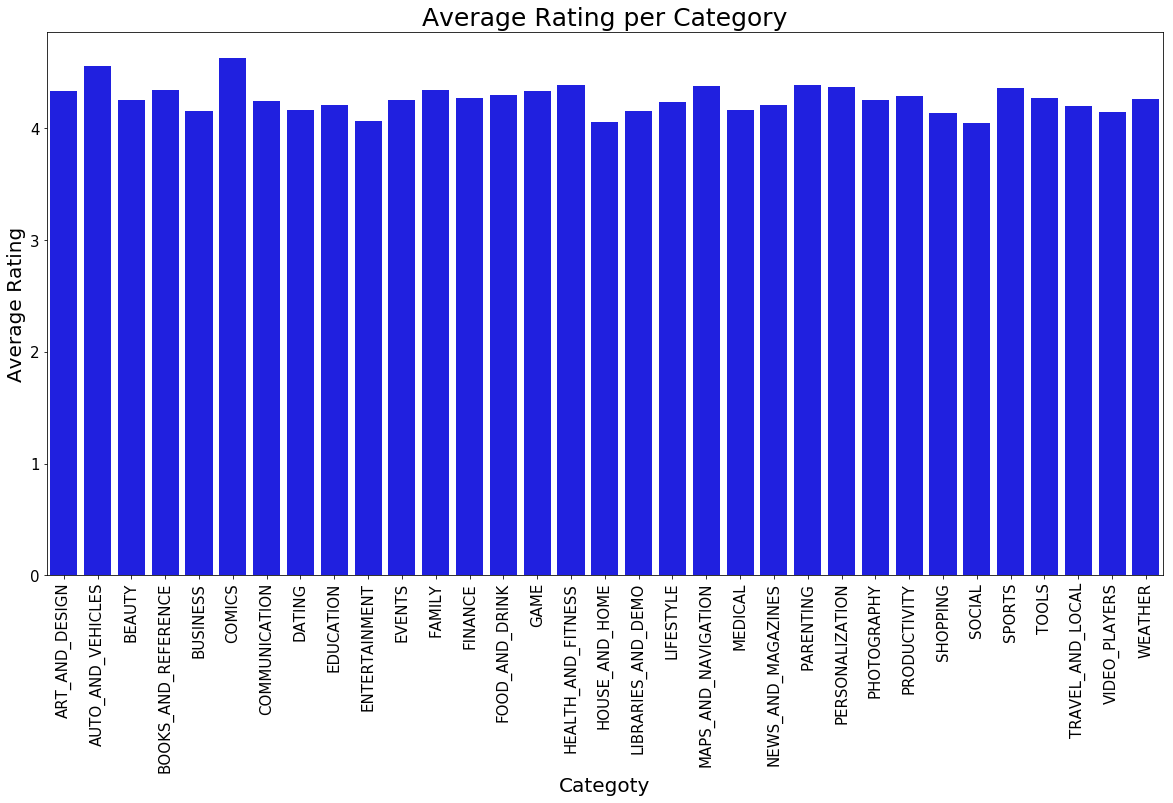

In [105]:
plt.figure(figsize=(20,10))
avg_sent_pol = sns.barplot(x=play_store_category.index, y=play_store_category.Rating, data=play_store_category, color ='blue')
avg_sent_pol.axes.set_title("Average Rating per Category",fontsize=25)
avg_sent_pol.set_xlabel("Categoty",fontsize=20)
avg_sent_pol.set_ylabel("Average Rating",fontsize=20)
avg_sent_pol.tick_params(labelsize=15)
plt.xticks(rotation=90)

There are no category significantly recives higher rating compare to the others

In [23]:
play_store_sentiment = play_store_reviews.groupby('Sentiment').mean()
play_store_sentiment

,Sentiment_Polarity,Sentiment_Subjectivity
Sentiment,,
Negative,-0.256173,0.535087
Neutral,0.000000,0.079709
Positive,0.372402,0.566949


In [24]:
play_store_reviews.Sentiment.value_counts()

Positive    23998
Negative     8271
Neutral      5163
Name: Sentiment, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

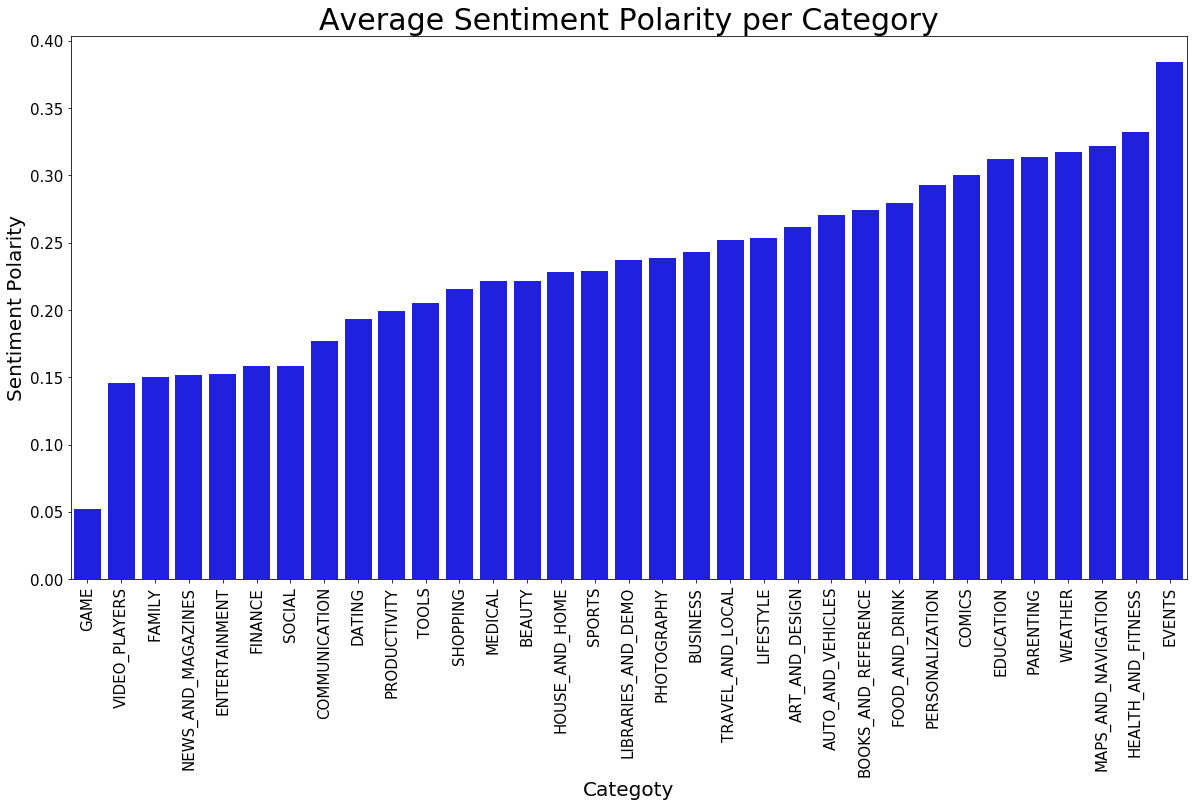

In [106]:
play_store_category = play_store.groupby('Category').mean().sort_values(('Sentiment_Polarity'), ascending=True)
plt.figure(figsize=(20,10))
avg_sent_pol = sns.barplot(x=play_store_category.index, y=play_store_category.Sentiment_Polarity, data=play_store_category, color ='blue')
avg_sent_pol.axes.set_title("Average Sentiment Polarity per Category",fontsize=30)
avg_sent_pol.set_xlabel("Categoty",fontsize=20)
avg_sent_pol.set_ylabel("Sentiment Polarity",fontsize=20)
avg_sent_pol.tick_params(labelsize=15)
plt.xticks(rotation=90)

Events received a high average sentiment ploarity score while Game category received the lost score.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

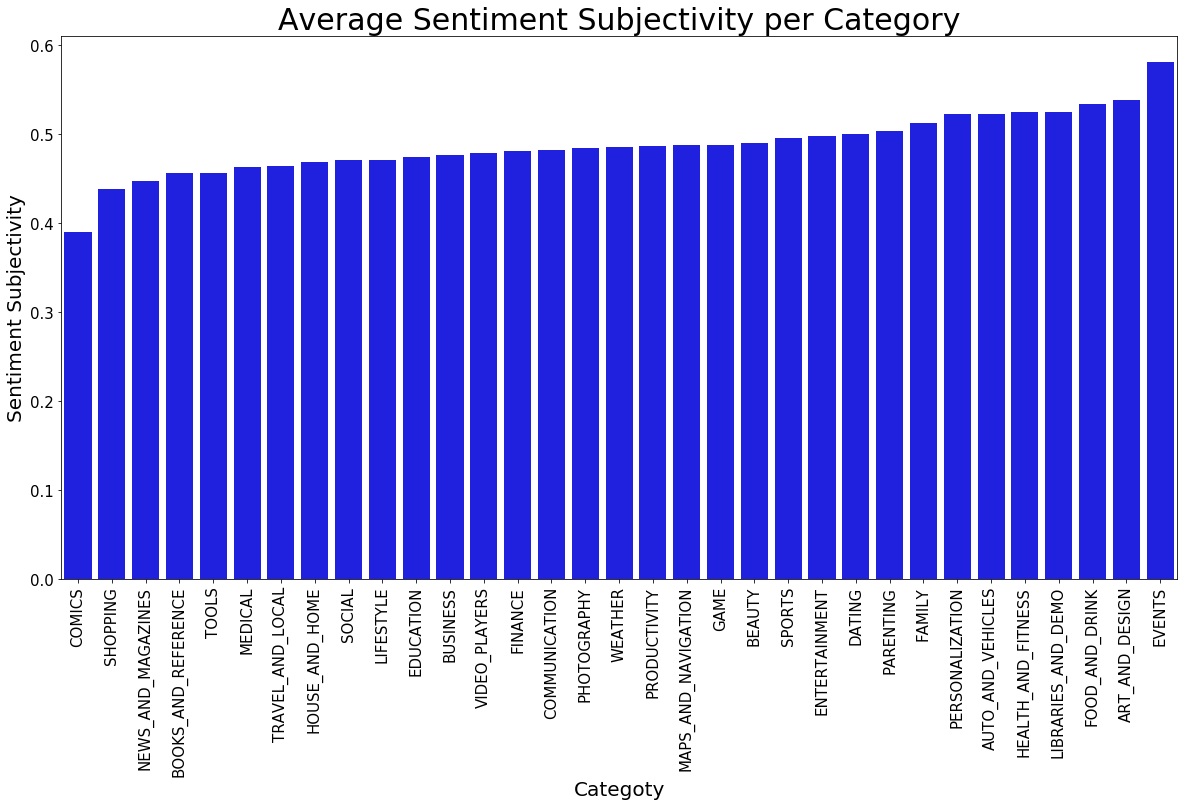

In [107]:
play_store_category = play_store.groupby('Category').mean().sort_values(('Sentiment_Subjectivity'), ascending=True)
plt.figure(figsize=(20,10))
avg_sent_pol = sns.barplot(x=play_store_category.index, y=play_store_category.Sentiment_Subjectivity, data=play_store_category, color ='blue')
avg_sent_pol.axes.set_title("Average Sentiment Subjectivity per Category",fontsize=30)
avg_sent_pol.set_xlabel("Categoty",fontsize=20)
avg_sent_pol.set_ylabel("Sentiment Subjectivity",fontsize=20)
avg_sent_pol.tick_params(labelsize=15)
plt.xticks(rotation=90)


Again, Even categoty receievd the highest Sentiment Subjectiviy score. We need to invisitgate further and check the reasons behind this difference.We are checking below all the reviews for the app under EVENts category. and we choosen "All Events in City"

In [108]:
play_store.loc[play_store['Category'] == 'EVENTS']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Sentiment_Polarity,Sentiment_Subjectivity,reviews_numeric
365,All Events in City,EVENTS,4.0,3782,9.5M,"100,000+",Free,0,Everyone,Events,"June 12, 2018",8.4,4.0.3 and up,0.502860,0.561821,5387333
367,DroidAdmin for Android - Advice,EVENTS,4.2,811,2.8M,"10,000+",Free,0,Everyone,Events,"May 29, 2018",3.8,4.0 and up,0.126175,0.507450,136662
370,Events High - Meet Your City!,EVENTS,4.2,3200,Varies with device,"100,000+",Free,0,Everyone 10+,Events,"June 23, 2018",Varies with device,Varies with device,NaN,NaN,3128250
366,Fever,EVENTS,4.0,20611,12M,"1,000,000+",Free,0,Teen,Events,"July 18, 2018",4.3.6,4.1 and up,NaN,NaN,3648120
369,"Gametime - Tickets to Sports, Concerts, Theater",EVENTS,4.5,8800,24M,"1,000,000+",Free,0,Everyone,Events,"July 17, 2018",11.1.1,5.0 and up,0.379740,0.570218,781810
371,Goldstar: Live Event Tickets,EVENTS,4.5,1953,Varies with device,"100,000+",Free,0,Teen,Events,"August 1, 2018",Varies with device,Varies with device,0.549266,0.635455,2083237
368,Happy Birthday Songs Offline,EVENTS,4.4,464,8.9M,"100,000+",Free,0,Everyone,Events,"December 4, 2017",1.3,4.1 and up,0.364706,0.634314,42370


In [110]:
play_store_reviews.loc[(play_store_reviews['App'] == 'All Events in City')]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
5532,All Events in City,Very useful responsive developers. When seriou...,Positive,0.151111,0.555556
5533,All Events in City,This I searching long time. Tha shows events h...,Positive,0.380556,0.505556
5534,All Events in City,NaN,NaN,NaN,NaN
5535,All Events in City,NaN,NaN,NaN,NaN
5536,All Events in City,NaN,NaN,NaN,NaN
5537,All Events in City,NaN,NaN,NaN,NaN
5538,All Events in City,Excellent app. The event image saved calendar ...,Positive,1.000000,1.000000
5539,All Events in City,Good know happenings around town.,Positive,0.700000,0.600000
5540,All Events in City,Great app...90% accurate information,Positive,0.600000,0.691667
5541,All Events in City,Nice awareness local events.,Positive,0.300000,0.500000


As you can see above. There is an issue with the Sentiment Subjectivity metrics. For example a review that has only the word "Happy" received a full mark 1.0 ,while other reviews which are more informative and related to the customer experience with the app received lower scores. This makes us question the besis of sentiment subjectivity score.

In order to check the relationship between number of installs and the rating. we need to remove the "," and "+" signs for the values under Installs column and then change the values to Integers. Eeventhough this is a categorical variable but we changed to integers for the purpose of sorting for better plot appearnce

In [164]:
play_store['installs_numeric'] = pd.to_numeric(play_store_stat['Installs'].str.replace('+','').str.replace(',',''), errors='ignore')
play_store.installs_numeric = play_store.installs_numeric.astype(int)

In [165]:
play_store_installs = play_store.groupby('installs_numeric').mean()
play_store_installs

,Rating,Reviews,Sentiment_Polarity,Sentiment_Subjectivity
installs_numeric,,,,
100,4.333333,183424.000000,0.282817,0.530570
500,4.300000,641586.333333,0.176197,0.511832
1000,4.260000,534498.200000,0.101943,0.351515
5000,4.275000,396147.000000,0.295660,0.559806
10000,4.347059,328870.823529,0.241212,0.500666
50000,4.344444,566813.333333,0.176702,0.476728
100000,4.287037,107765.555556,0.243314,0.494133
500000,4.313889,122876.083333,0.193780,0.477821
1000000,4.238043,156841.385870,0.217618,0.483111


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

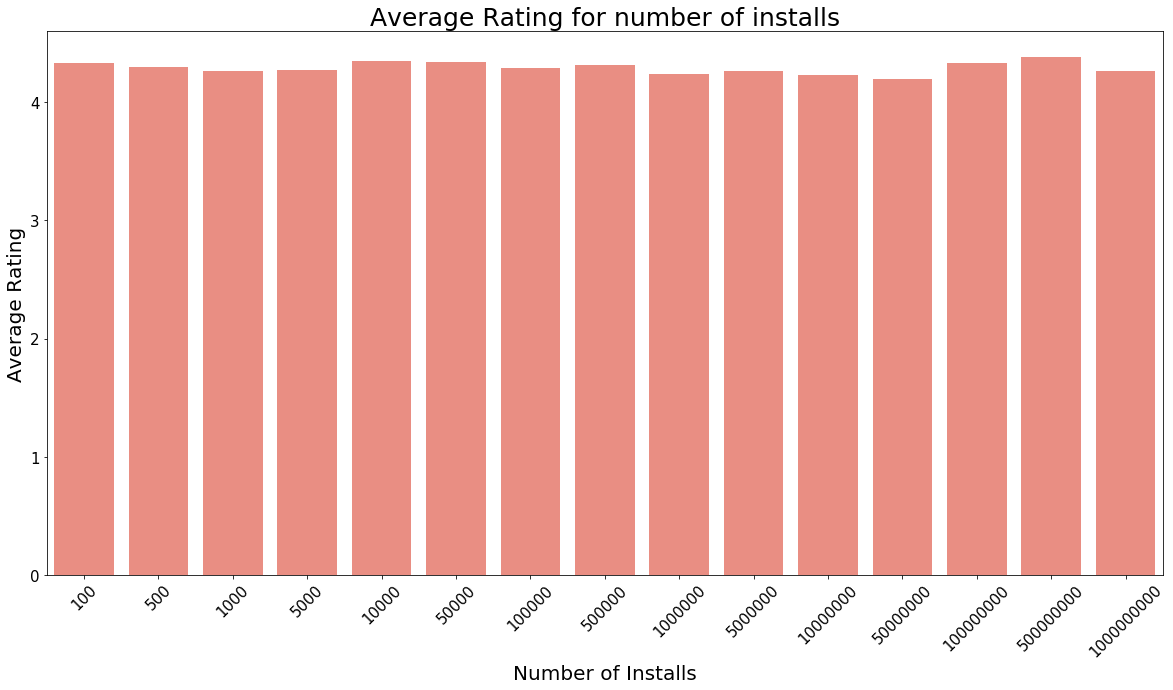

In [168]:
plt.figure(figsize=(20,10))
installs_rating = sns.barplot(x=play_store_installs.index, y=play_store_installs.Rating, data=play_store_installs, color ='salmon')
installs_rating.axes.set_title("Average Rating for number of installs",fontsize=25)
installs_rating.set_xlabel("Number of Installs",fontsize=20)
installs_rating.set_ylabel("Average Rating",fontsize=20)
installs_rating.tick_params(labelsize=15)
plt.xticks(rotation=45)


The bar chart above shows no relation between the number of installs and customer rating. The same conclusion can be drawn from the box plot below which shows no relation between number of installs and the Sentiment polarity 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

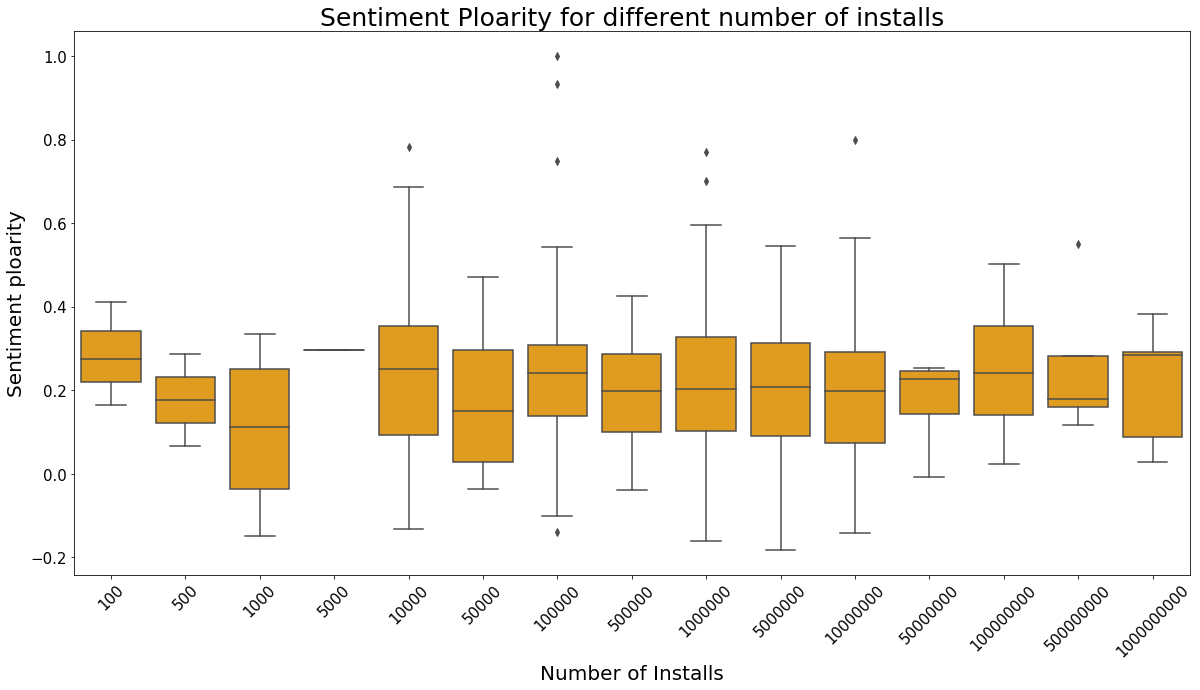

In [172]:
plt.figure(figsize=(20,10))
avg_sent_pol = sns.boxplot(x= 'installs_numeric', y='Sentiment_Polarity', data=play_store, color='orange')
avg_sent_pol.axes.set_title("Sentiment Ploarity for different number of installs",fontsize=25)
avg_sent_pol.set_xlabel("Number of Installs",fontsize=20)
avg_sent_pol.set_ylabel("Sentiment ploarity",fontsize=20)
avg_sent_pol.tick_params(labelsize=15)
plt.xticks(rotation=45)

## Analaysis

First, we have checked how many free and paid apps available in the sample.it showsthe majority of the apps were free (%98.82) while only 8 apps were paid.

In [158]:
play_store["Type"].describe()

count      680
unique       2
top       Free
freq       672
Name: Type, dtype: object

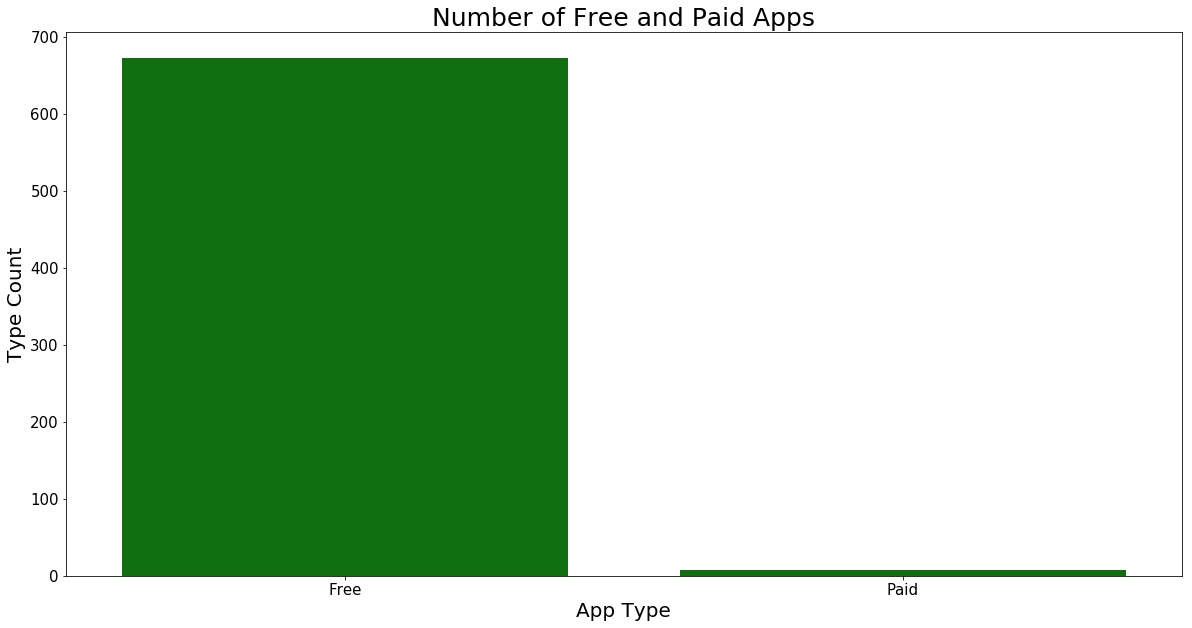

In [111]:
plt.figure(figsize=(20,10))
rating_count = sns.countplot(x="Type", data=play_store, color= 'green')
rating_count.axes.set_title("Number of Free and Paid Apps" ,fontsize=25)
rating_count.set_xlabel("App Type",fontsize=20)
rating_count.set_ylabel("Type Count",fontsize=20)
rating_count.tick_params(labelsize=15)

We are going to devide the dataset into two datasets. One for the apps contains the word "FREE" in the app name(title) and the other dataset will reatin the remaining apps

In [186]:
free_app_name=play_store[play_store['App'].str.contains('free', case=False)] 
free_app_name

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,reviews_numeric,Sentiment_Polarity,Sentiment_Subjectivity,installs_numeric
269,ABC Preschool Free,EDUCATION,3.8,27572,25M,"5,000,000+",Free,0,Everyone,Education;Education,"October 25, 2017",3.0,2.3 and up,27572,0.220805,0.422971,5000000
1254,Alarm Clock Free,TOOLS,4.0,59973,11M,"10,000,000+",Free,0,Everyone,Tools,"March 16, 2018",1.2.5,4.0 and up,59973,0.155762,0.356840,10000000
52,All Language Translator Free,BOOKS_AND_REFERENCE,4.4,30105,2.1M,"1,000,000+",Free,0,Everyone,Books & Reference,"July 29, 2018",1.15,4.0.3 and up,30105,0.392784,0.555032,1000000
861,All-in-One Mahjong 3 FREE,FAMILY,4.5,566,17M,"50,000+",Free,0,Everyone,Board;Brain Games,"June 13, 2018",20180609,4.0 and up,566,0.500000,0.600000,5000000
1419,"Amazon FreeTime – Kids’ Videos, Books, & TV shows",PARENTING,4.2,2715,24M,"500,000+",Free,0,Everyone,Parenting;Music & Video,"July 24, 2018",FreeTimeApp-aosp_v3.14_Build-1.0.204367.0.13014,5.0 and up,2715,0.342535,0.508083,500000
1400,AndroZip™ FREE File Manager,PRODUCTIVITY,4.2,277794,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"December 7, 2016",Varies with device,Varies with device,277794,0.117323,0.390172,50000
551,Aviary Stickers: Free Pack,LIBRARIES_AND_DEMO,3.5,126862,624k,"10,000,000+",Free,0,Everyone,Libraries & Demo,"January 17, 2012",1.0,2.2 and up,126862,0.065829,0.672514,10000000
208,BeWild Free Dating & Chat App,DATING,3.4,1999,8.0M,"100,000+",Free,0,Mature 17+,Dating,"February 3, 2017",1.6.5,4.2 and up,1999,0.170372,0.518070,5000000
548,Best New Ringtones 2018 Free 🔥 For Android™,LIBRARIES_AND_DEMO,4.6,3014,21M,"100,000+",Free,0,Everyone,Libraries & Demo,"June 27, 2018",1.1,5.0 and up,3014,NaN,NaN,5000000
1014,Blidz - Hunt Free Deals On Trending Items!,SHOPPING,4.4,1659,33M,"50,000+",Free,0,Everyone,Shopping,"June 29, 2018",2.4.0,4.4 and up,1659,NaN,NaN,1000000


In [187]:
no_free_app_name=play_store[~play_store['App'].str.contains('free', case=False)]
no_free_app_name.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,reviews_numeric,Sentiment_Polarity,Sentiment_Subjectivity,installs_numeric
995,11st,SHOPPING,3.8,48732,20M,"10,000,000+",Free,0,Everyone,Shopping,"July 31, 2018",7.8.1,4.0 and up,48732,0.181294,0.443957,100000
802,1LINE – One Line with One Touch,GAME,4.6,214878,10M,"10,000,000+",Free,0,Everyone,Board,"August 3, 2018",2.0.4,4.1 and up,214878,0.196290,0.557315,1000000
1340,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,PERSONALIZATION,4.2,115773,Varies with device,"10,000,000+",Free,0,Everyone,Personalization,"May 22, 2018",Varies with device,4.1 and up,115773,0.449566,0.520573,5000000
250,"2Date Dating App, Love and matching",DATING,4.4,41605,8.1M,"500,000+",Free,0,Mature 17+,Dating,"July 26, 2018",4.813,4.0.3 and up,41605,0.280267,0.558391,1000000
1199,2GIS: directory & navigator,TRAVEL_AND_LOCAL,4.5,768833,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,"July 30, 2018",Varies with device,Varies with device,768833,0.223129,0.396658,10000000


In [173]:
len(free_app_name)

59

In [174]:
len(no_free_app_name)

621

There were only 59 apps contains the word "FREE" while the remaing 621 apps do not include this work on their name(title)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

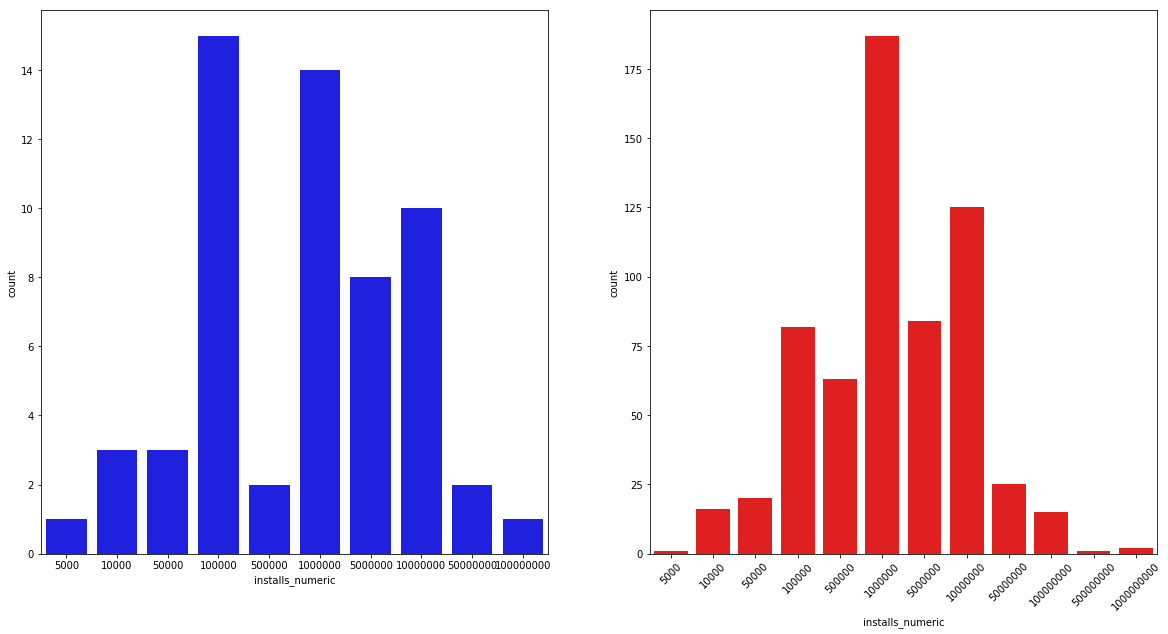

In [176]:
fig, ax =plt.subplots(1, 2, figsize=(20,10))
sns.countplot(free_app_name["installs_numeric"], color= 'blue', ax=ax[0])
sns.countplot(no_free_app_name["installs_numeric"], color= 'red', ax=ax[1])
plt.xticks(rotation=45)

In [67]:
free_app_name["installs_numeric"].describe()

count    5.900000e+01
mean     6.045508e+06
std      1.556871e+07
min      5.000000e+03
25%      1.000000e+05
50%      1.000000e+06
75%      5.000000e+06
max      1.000000e+08
Name: installs_numeric, dtype: float64

In [68]:
no_free_app_name["installs_numeric"].describe()

count    6.210000e+02
mean     1.151025e+07
std      6.215265e+07
min      5.000000e+03
25%      5.000000e+05
50%      1.000000e+06
75%      1.000000e+07
max      1.000000e+09
Name: installs_numeric, dtype: float64

The two barcharts above and the statistical describition of both datasets shows no significant difference between both datasets in terms of number of installs

(array([2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5]),
 <a list of 7 Text xticklabel objects>)

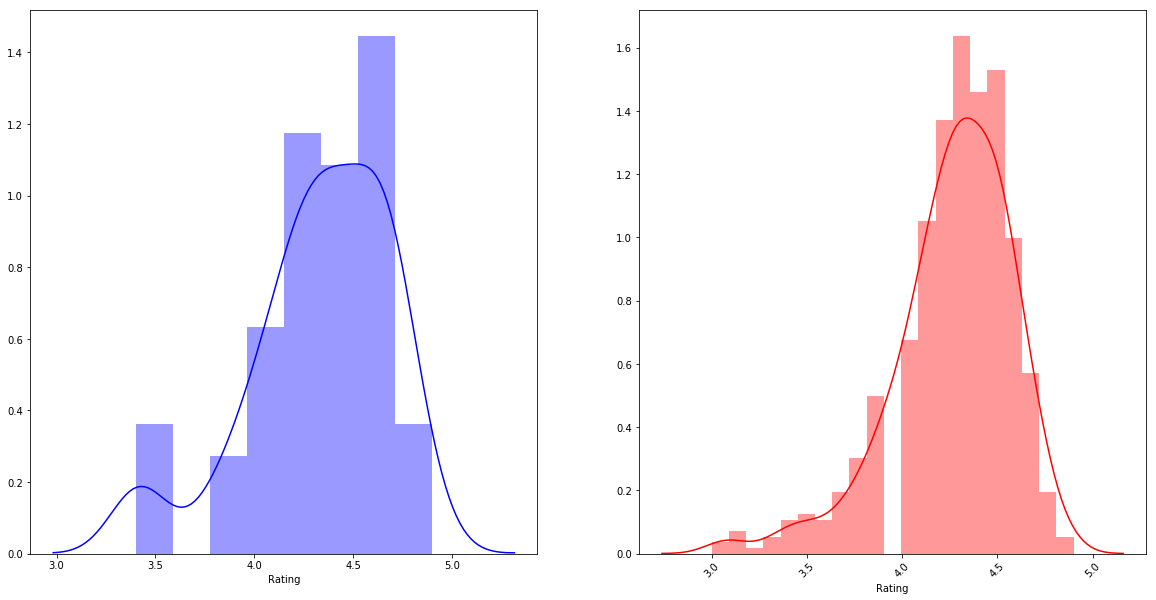

In [180]:
fig, ax =plt.subplots(1, 2, figsize=(20,10))
sns.distplot(free_app_name["Rating"], color= 'blue', ax=ax[0])
sns.distplot(no_free_app_name["Rating"], color= 'red', ax=ax[1])
plt.xticks(rotation=45)

In [181]:
free_app_name["Rating"].describe()

count    59.000000
mean      4.332203
std       0.361243
min       3.400000
25%       4.200000
50%       4.400000
75%       4.600000
max       4.900000
Name: Rating, dtype: float64

In [182]:
no_free_app_name["Rating"].describe()

count    621.000000
mean       4.265217
std        0.317167
min        3.000000
25%        4.100000
50%        4.300000
75%        4.500000
max        4.900000
Name: Rating, dtype: float64

The two distribution charts and the statistical describition of both datasets shows no significant difference between both datasets in terms of average customer rating

In [184]:
play_store.Reviews = play_store.Reviews.astype(int)

(array([-2000000.,        0.,  2000000.,  4000000.,  6000000.,  8000000.,
        10000000., 12000000.]), <a list of 8 Text xticklabel objects>)

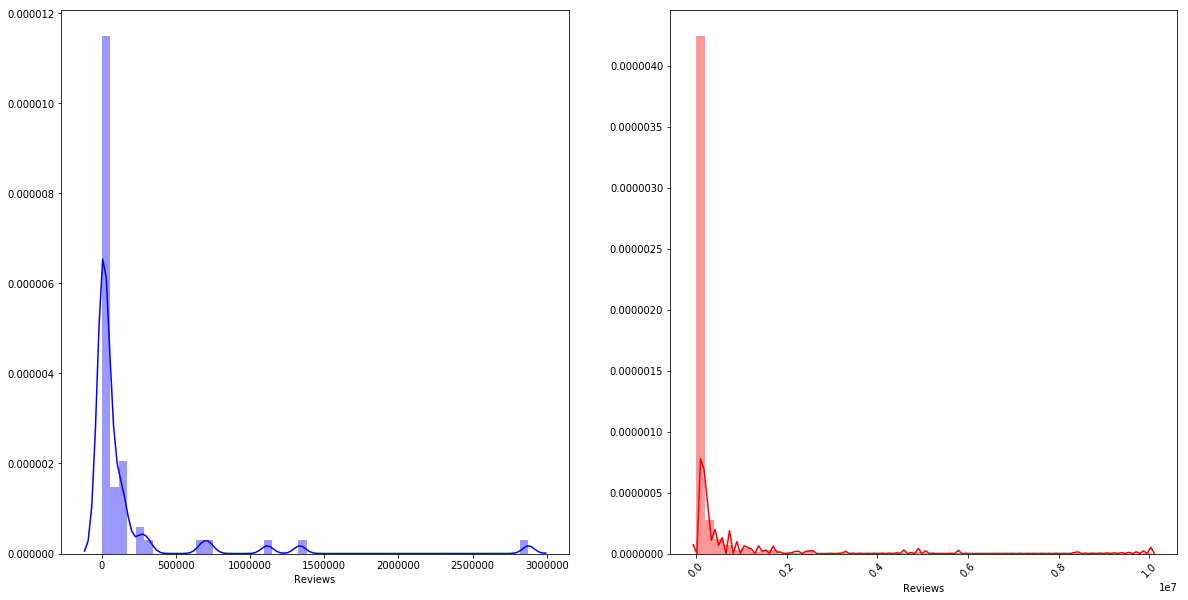

In [188]:
fig, ax =plt.subplots(1, 2, figsize=(20,10))
sns.distplot(free_app_name["Reviews"], color= 'blue', ax=ax[0])
sns.distplot(no_free_app_name["Reviews"], color= 'red', ax=ax[1])
plt.xticks(rotation=45)

In [189]:
free_app_name["Reviews"].describe()

count    5.900000e+01
mean     1.597147e+05
std      4.397526e+05
min      1.580000e+02
25%      1.900500e+03
50%      2.366600e+04
75%      1.130035e+05
max      2.876500e+06
Name: Reviews, dtype: float64

In [190]:
no_free_app_name["Reviews"].describe()

count    6.210000e+02
mean     2.034401e+05
std      7.633232e+05
min      1.140000e+02
25%      4.751000e+03
50%      2.206300e+04
75%      9.555700e+04
max      1.005319e+07
Name: Reviews, dtype: float64

The two distribution charts and the statistical describition of both datasets shows no significant difference between both datasets in terms of Number of customer reviews

## Conculsion 

Inclusion of word "FREE" in the app name or title has no change on the success of the app. It did no0t show any significant improvement in terms of number of installs/downloads. it also did not receive more reviews or gain higher customer satisfaction through higher review ratings.